# Population Stratification 

This is the presence of multiple subpopulations (e.g., individuals with different ethnic background) in a study. Because allele frequencies can differ between subpopulations, population stratification can lead to false positive associations and/or mask true associations. 

To complete this task it is necessary to have generated the bfile 'dataset.b37_IBD' and the file 'indepSNP.prune.in' from the previous tutorial (Task_2.1_QC). This bfile is going to checked for population stratification using data from the 1000 Genomes Project. Individuals with a non-European ethnic background will be removed. 1000 Genomes data need to be processed before hand.

Furthermore, this guide will generate a covariate file which helps to adust for remaining population stratification within the European subjects.

This protocol follows the tutorial explained in Marees AT, de Kluiver H, Stringer S, et al. A tutorial on conducting genome-wide association studies: Quality control and statistical analysis. Int J Methods Psychiatr Res. 2018;27(2):e1608.doi:10.1002/mpr.1608

# 1000 Genome data preparation

Data from the 1000 Genomes Project need to be processed before used for population stratification. 

To complete this task it is necessary to have generated the bfile 'dataset.b37_IBD' from the previous tutorial (Task_2_QC).

In [1]:
%load_ext rpy2.ipython

In [2]:
%env path=/mnt/data/GWAS/output/build37/task2_QC
%env intpath=/mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets
%env ref_files=/mnt/data/GWAS/ref_files/Phase3_v5

env: path=/mnt/data/GWAS/output/build37/task2_QC
env: intpath=/mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets
env: ref_files=/mnt/data/GWAS/ref_files/Phase3_v5


In [3]:
%%R
# Import functions for visualisation
source("scripts/QC_functions_task2.R")

In [4]:
%%bash 
# Get a list of SNPs from your working dataset
awk '{print $2}' $intpath/dataset.b37.IBD.bim > $path/mySNPlist.txt
head $path/mySNPlist.txt

1:10177
1:11008
1:11012
1:13110
rs201725126
rs200579949
1:13273
1:14464
1:14599
1:14604


In [5]:
%%bash
# Creates a recode vcf per chromosome, using as input 1000 Genomes compressed vcf file per chr and previous SNPs list.
# Then plink converts them to bfiles. 
# This step takes long to be executed; you can skip this one and go to the next step
for i in {1..22}
do
vcftools --gzvcf $ref_files/ALL.chr$i.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.clean.vcf.gz --snps $path/mySNPlist.txt --recode --out $path/1KG.vcf.chr$i
plink --vcf $path/1KG.vcf.chr$i.recode.vcf --make-bed --out $path/1KG.chr$i
rm $path/1KG.vcf.chr$i.recode.vcf
done

PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/1KG.chr1.log.
Options in effect:
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/1KG.chr1
  --vcf /mnt/data/GWAS/output/build37/task2_QC/1KG.vcf.chr1.recode.vcf

257659 MB RAM detected; reserving 128829 MB for main workspace.
--vcf: /mnt/data/GWAS/output/build37/task2_QC/1KG.chr1-temporary.bed +
/mnt/data/GWAS/output/build37/task2_QC/1KG.chr1-temporary.bim +
/mnt/data/GWAS/output/build37/task2_QC/1KG.chr1-temporary.fam written.
497923 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/mnt/data/GWAS/output/build37/task2_QC/1KG.chr1.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2504 founders and 0 nonfounders present.
Calculating allele frequencies.


VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/data/GWAS/ref_files/Phase3_v5/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.clean.vcf.gz
	--out /mnt/data/GWAS/output/build37/task2_QC/1KG.vcf.chr1
	--recode
	--snps /mnt/data/GWAS/output/build37/task2_QC/mySNPlist.txt

Using zlib version: 1.2.11
After filtering, kept 2504 out of 2504 Individuals
Outputting VCF file...
After filtering, kept 497923 out of a possible 6467265 Sites
Run Time = 643.00 seconds

VCFtools - 0.1.15
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /mnt/data/GWAS/ref_files/Phase3_v5/ALL.chr2.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.clean.vcf.gz
	--out /mnt/data/GWAS/output/build37/task2_QC/1KG.vcf.chr2
	--recode
	--snps /mnt/data/GWAS/output/build37/task2_QC/mySNPlist.txt

Using zlib version: 1.2.11
After filtering, kept 2504 out of 2504 Individuals
Outputting VCF file...
After filtering, kept 5

In [6]:
%%bash
# Creates a file with the list of bfiles (.bim, .bed, .fam) outputed in the previous step
# 1st-3rd parameter: path to previous plink files
# 4th parameter: output file
for i in {2..22}
do
echo $path/1KG.chr$i.bed $path/1KG.chr$i.bim $path/1KG.chr$i.fam >> $path/1KG.outlist.txt
done

In [7]:
%%bash
# Merge all bfiles into a single one
plink --bfile $path/1KG.chr1 --make-bed --merge-list $path/1KG.outlist.txt --out $path/1KG.all

PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/1KG.all.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/1KG.chr1
  --make-bed
  --merge-list /mnt/data/GWAS/output/build37/task2_QC/1KG.outlist.txt
  --out /mnt/data/GWAS/output/build37/task2_QC/1KG.all

257659 MB RAM detected; reserving 128829 MB for main workspace.
Performing single-pass merge (2504 people, 6505760 variants).
Merged fileset written to                     
/mnt/data/GWAS/output/build37/task2_QC/1KG.all-merge.bed +
/mnt/data/GWAS/output/build37/task2_QC/1KG.all-merge.bim +
/mnt/data/GWAS/output/build37/task2_QC/1KG.all-merge.fam .
6505760 variants loaded from .bim file.
2504 people (0 males, 0 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/mnt/data/GWAS/output/build37/task2_QC/1KG.all.nosex .
Using 1 thread (no mul

In [8]:
%%bash
# remove individual chr plink files
for i in {2..22}
do
rm $path/1KG.chr$i.*
done

## Merge the working dataset and 1000 Genomes data sets 

Prior to merging 1000 Genomes data with the HapMap data we want to make sure that the files are mergeable, for this we conduct 5 steps:
1. Extract the variants present in one dataset from the other
2. Resolve strand issues.
3. Remove the SNPs which after the previous two steps still differ between datasets.

In [9]:
%%bash
# Extract the variants present in 1000 Genomes dataset from the working dataset.
# awk '{print$2}' $intpath/1kG.all.bim > $path/1kG_MDS_SNPs.txt
plink --bfile $intpath/dataset.b37.IBD --extract $path/1KG.all.bim --recode --make-bed --out $intpath/dataset.b37_MDS
# The datasets now contain the exact same variants.


PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37.IBD
  --extract /mnt/data/GWAS/output/build37/task2_QC/1KG.all.bim
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS
  --recode

257659 MB RAM detected; reserving 128829 MB for main workspace.
7076087 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
--extract: 6505760 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 496 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464

### Set reference allele

In [10]:
%%bash
awk '{print$2,$5}' $path/1KG.all.bim > $path/1kg_ref-list.txt
plink --bfile $intpath/dataset.b37_MDS --reference-allele $path/1kg_ref-list.txt --make-bed --out $intpath/dataset.b37_adj
# The 1kG_MDS7 and the dataset.b37_adj have the same reference genome for all SNPs.
# This command will generate some warnings for impossible A1 allele assignment.

PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_adj.log.
Options in effect:
  --a1-allele /mnt/data/GWAS/output/build37/task2_QC/1kg_ref-list.txt
  --bfile /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_adj

257659 MB RAM detected; reserving 128829 MB for main workspace.
6505760 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 496 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768

In [11]:
%%bash
head $path/1kg_ref-list.txt

rs200579949 G
rs199856693 A
rs141149254 A
rs114420996 A
rs201888535 C
rs114608975 C
rs115209712 G
rs940550 T
rs55700207 A
rs147538909 T


### Resolve strand issues

In [12]:
%%bash
# Check for potential strand issues.
awk '{print$2,$5,$6}' $path/1KG.all.bim > $intpath/1kGall_tmp
awk '{print$2,$5,$6}' $intpath/dataset.b37_adj.bim > $intpath/dataset.b37_adj_tmp
sort $intpath/1kGall_tmp $intpath/dataset.b37_adj_tmp |uniq -u > $path/all_differences.txt
# 996 differences between the files, some of these might be due to strand issues.
head $path/all_differences.txt
wc $path/all_differences.txt

rs10013793 G T
rs10013793 T TTG
rs10544831 A ATT
rs10544831 C T
rs10546076 C T
rs10546076 T TGTTC
rs10547535 A ACAG
rs10547535 G A
rs10566332 C CAT
rs10566332 C T
  996  2988 17134 /mnt/data/GWAS/output/build37/task2_QC/all_differences.txt


In [13]:
%%bash
# Flip SNPs for resolving strand issues.
# Print SNP-identifier and remove duplicates.
awk '{print$1}' $path/all_differences.txt | sort -u > $path/flip_list.txt
wc $path/flip_list.txt
# Generates a file of 498 SNPs. These are the non-corresponding SNPs between the two files. 
# Flip the 498 non-corresponding SNPs. 
plink --bfile $intpath/dataset.b37_adj --flip $path/flip_list.txt --reference-allele $path/1kg_ref-list.txt --make-bed --out $intpath/dataset.b37.corrected
# This command will generate some warnings for impossible A1 allele assignment.

 498  498 5621 /mnt/data/GWAS/output/build37/task2_QC/flip_list.txt
PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37.corrected.log.
Options in effect:
  --a1-allele /mnt/data/GWAS/output/build37/task2_QC/1kg_ref-list.txt
  --bfile /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_adj
  --flip /mnt/data/GWAS/output/build37/task2_QC/flip_list.txt
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37.corrected

257659 MB RAM detected; reserving 128829 MB for main workspace.
6505760 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
--flip: 497 SNPs flipped.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 496 founders and 0 nonfo

In [14]:
%%bash
# Check for SNPs which are still problematic after they have been flipped.
awk '{print$2,$5,$6}' $intpath/dataset.b37.corrected.bim > $intpath/dataset.b37.corrected_tmp
sort $intpath/1kGall_tmp $intpath/dataset.b37.corrected_tmp |uniq -u  > $path/uncorresponding_SNPs.txt

In [15]:
%%bash
# This file demonstrates that there are 984 differences between the files.
wc -l $path/uncorresponding_SNPs.txt
head $path/uncorresponding_SNPs.txt

984 /mnt/data/GWAS/output/build37/task2_QC/uncorresponding_SNPs.txt
rs10013793 A TTG
rs10013793 G T
rs10544831 C T
rs10544831 T ATT
rs10546076 A TGTTC
rs10546076 C T
rs10547535 G A
rs10547535 T ACAG
rs10566332 A G
rs10566332 C CAT


### Remove problematic SNPs from the working dataset and 1000 Genomes

In [16]:
%%bash
awk '{print$1}' $path/uncorresponding_SNPs.txt | sort -u > $path/SNPs_for_exlusion.txt
# The command above generates a list of the SNPs which caused the 984 differences between the working dataset (i.e HapMap) and the 1000 Genomes data sets after flipping and setting of the reference genome.
head $path/SNPs_for_exlusion.txt

rs10013793
rs10544831
rs10546076
rs10547535
rs10566332
rs10569851
rs10598951
rs10627420
rs10646909
rs10650743


In [17]:
%%bash
# Remove the problematic SNPs from both datasets.
plink --bfile $intpath/dataset.b37.corrected --exclude $path/SNPs_for_exlusion.txt --make-bed --out $intpath/dataset.b37_MDS2
plink --bfile $path/1KG.all --exclude $path/SNPs_for_exlusion.txt --make-bed --out $path/1kG_MDS


PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS2.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37.corrected
  --exclude /mnt/data/GWAS/output/build37/task2_QC/SNPs_for_exlusion.txt
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS2

257659 MB RAM detected; reserving 128829 MB for main workspace.
6505760 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
--exclude: 6505268 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 496 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243

### Merge the working dataset with 1000 Genomes Data

In [18]:
%%bash
# Merge HapMap with 1000 Genomes Data.
plink --bfile $intpath/dataset.b37_MDS2 --bmerge $path/1kG_MDS.bed $path/1kG_MDS.bim $path/1kG_MDS.fam --allow-no-sex --make-bed --out $path/MDS_merge2

# Note, we are fully aware of the sample overlap between the HapMap and 1000 Genomes datasets. However, for the purpose of this tutorial this is not important.


PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/MDS_merge2.log.
Options in effect:
  --allow-no-sex
  --bfile /mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS2
  --bmerge /mnt/data/GWAS/output/build37/task2_QC/1kG_MDS.bed /mnt/data/GWAS/output/build37/task2_QC/1kG_MDS.bim /mnt/data/GWAS/output/build37/task2_QC/1kG_MDS.fam
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/MDS_merge2

257659 MB RAM detected; reserving 128829 MB for main workspace.
496 people loaded from
/mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b37_MDS2.fam.
2504 people to be merged from
/mnt/data/GWAS/output/build37/task2_QC/1kG_MDS.fam.
Of these, 2504 are new, while 0 are present in the base dataset.
6505268 markers loaded from
/mnt/data/GWAS/output/build37/task2_QC/intermediate_datasets/dataset.b3

22 more multiple-position warnings: see log file.


## Perform Multidimensional Scaling (MDS)

In [19]:
%%bash
# Using a set of pruned SNPs
plink --bfile $path/MDS_merge2 --extract $path/../task2_QC/indepSNP.prune.in --genome --out $path/MDS_merge2
plink --bfile $path/MDS_merge2 --read-genome $path/MDS_merge2.genome --cluster --mds-plot 10 --out $path/MDS_merge2

PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/MDS_merge2.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/MDS_merge2
  --extract /mnt/data/GWAS/output/build37/task2_QC/../task2_QC/indepSNP.prune.in
  --genome
  --out /mnt/data/GWAS/output/build37/task2_QC/MDS_merge2

257659 MB RAM detected; reserving 128829 MB for main workspace.
6505268 variants loaded from .bim file.
3000 people (237 males, 259 females, 2504 ambiguous) loaded from .fam.
Ambiguous sex IDs written to
/mnt/data/GWAS/output/build37/task2_QC/MDS_merge2.nosex .
496 phenotype values loaded from .fam.
--extract: 390066 variants remaining.
Using up to 4 threads (change this with --threads).
Before main variant filters, 3000 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343

## MDS-plot

In [20]:
%%bash
# 1000 Genomes superpopulation codes
wc -l /mnt/data/GWAS/ref_files/1000G_superpopulation_codes.txt
head /mnt/data/GWAS/ref_files/1000G_superpopulation_codes.txt

2505 /mnt/data/GWAS/ref_files/1000G_superpopulation_codes.txt
FID	IID	SuperPop
HG00096	HG00096	EUR
HG00097	HG00097	EUR
HG00099	HG00099	EUR
HG00100	HG00100	EUR
HG00101	HG00101	EUR
HG00102	HG00102	EUR
HG00103	HG00103	EUR
HG00105	HG00105	EUR
HG00106	HG00106	EUR


In [21]:
%%bash
# Create a racefile of your own data.
awk '{print$1,$2,"OWN"}' $intpath/dataset.b37_MDS.fam>$path/racefile_own.txt
head $path/racefile_own.txt

HGX00096 HGX00096 OWN
HGX00097 HGX00097 OWN
HGX00099 HGX00099 OWN
HGX00100 HGX00100 OWN
HGX00101 HGX00101 OWN
HGX00102 HGX00102 OWN
HGX00103 HGX00103 OWN
HGX00105 HGX00105 OWN
HGX00106 HGX00106 OWN
HGX00107 HGX00107 OWN


In [22]:
%%bash
# Concatenate racefiles.
cat /mnt/data/GWAS/ref_files/1000G_superpopulation_codes.txt $path/racefile_own.txt  > $path/racefile.txt
head $path/racefile.txt

FID	IID	SuperPop
HG00096	HG00096	EUR
HG00097	HG00097	EUR
HG00099	HG00099	EUR
HG00100	HG00100	EUR
HG00101	HG00101	EUR
HG00102	HG00102	EUR
HG00103	HG00103	EUR
HG00105	HG00105	EUR
HG00106	HG00106	EUR


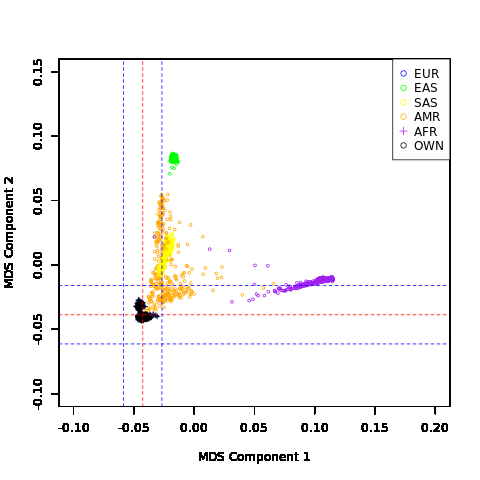

In [23]:
%%R
# Generate population stratification plot.
# 1st parameter: full path to MDS dataset.
# 2nd parameter: full path to racefile.
# Output pdf is stored in the same directory as the input data file

# Read lines represent the mean of each component, blue lines represent +/- 6 SD
MDS_function("/mnt/data/GWAS/output/build37/task2_QC/MDS_merge2.mds","/mnt/data/GWAS/output/build37/task2_QC/racefile.txt")

**The plot shows that our "own" data falls within the European group of the 1000 genomes data. Therefore, we do not have to remove subjects. Anyway we are running the filtering step for educational purposes.**

### Filter out population stratification outliers

A commonly used thershold is taking 6 standad deviation from population mean as theshold for excluding individuals.


In [24]:
%%bash
head $path/MDS_merge2.mds

      FID       IID    SOL           C1           C2           C3           C4           C5           C6           C7           C8           C9          C10 
  HG00096   HG00096      0   -0.0446801   -0.0405616   0.00817707   0.00831041  -0.00148972  -0.00256521    0.0129851  -0.00525496   0.00716223  -0.00357411 
  HG00097   HG00097      0   -0.0449411   -0.0403871   0.00771918   0.00673488  -0.00144457  -0.00301694    0.0088201   -0.0147722    0.0118504  -0.00546051 
  HG00099   HG00099      0   -0.0464586   -0.0404293   0.00748735    0.0055747   -0.0037389  -0.00526758    0.0216535   0.00931718    0.0073412   -0.0079541 
  HG00100   HG00100      0   -0.0424155    -0.040779   0.00726761   0.00767328  0.000635239  -0.00315927    0.0206008  -0.00180234  -0.00483294   -0.0114511 
  HG00101   HG00101      0   -0.0437484   -0.0402676   0.00779164    0.0062208  -0.00288284  -0.00481741    0.0238685   0.00486814     0.003675  -0.00676118 
  HG00102   HG00102      0   -0.0458155   -0.0399496

In [25]:
%%R
# Run getFailures.R to identify those individuals
# 1st parameter: full path to MDS dataset.
# 2nd parameter: full path to racefile.
# 3nd parameter: full path to threshold file
# 4rd parameter: output file
path<-"/mnt/data/GWAS/output/build37/task2_QC"
get_failures(paste0(path,"/MDS_merge2.mds"), paste0(path,"/racefile.txt"), paste0(path,"/thresholds.txt"), paste0(path,"/fail-pca-QC.txt"))

In [26]:
%%bash
wc -l $path/fail-pca-QC.txt
head $path/thresholds.txt

0 /mnt/data/GWAS/output/build37/task2_QC/fail-pca-QC.txt
"x"
"1" -0.0584498391348963
"2" -0.0266824483402528
"3" -0.0613468589365413
"4" -0.0160607207851287


In [27]:
%%bash
# Extract these individuals from the working dataset.
plink --bfile $path/../task2_QC/intermediate_datasets/dataset.b37.IBD --exclude $path/fail-pca-QC.txt --make-bed --out $path/dataset.b37.QCed

PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/../task2_QC/intermediate_datasets/dataset.b37.IBD
  --exclude /mnt/data/GWAS/output/build37/task2_QC/fail-pca-QC.txt
  --make-bed
  --out /mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed

257659 MB RAM detected; reserving 128829 MB for main workspace.
7076087 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
--exclude: 7076087 variants remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 496 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465

/mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed.hh ); many commands
treat these as missing.


#### Create covariates based on MDS

In [28]:
%%bash
# Perform an MDS ONLY on HapMap data without ethnic outliers. The values of the 10 MDS dimensions are subsequently used as covariates in the association analysis in the third tutorial.
plink --bfile $path/dataset.b37.QCed --extract $path/indepSNP.prune.in --genome --out $path/dataset.b37.QCed.genome
plink --bfile $path/dataset.b37.QCed --read-genome $path/dataset.b37.QCed.genome.genome --cluster --mds-plot 10 --out $path/dataset.b37.mds


PLINK v1.90b3.45 64-bit (13 Jan 2017)      https://www.cog-genomics.org/plink2
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed.genome.log.
Options in effect:
  --bfile /mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed
  --extract /mnt/data/GWAS/output/build37/task2_QC/indepSNP.prune.in
  --genome
  --out /mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed.genome

257659 MB RAM detected; reserving 128829 MB for main workspace.
7076087 variants loaded from .bim file.
496 people (237 males, 259 females) loaded from .fam.
496 phenotype values loaded from .fam.
--extract: 473808 variants remaining.
Using up to 4 threads (change this with --threads).
Before main variant filters, 496 founders and 0 nonfounders present.
Calculating allele frequencies... 1011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677

/mnt/data/GWAS/output/build37/task2_QC/dataset.b37.QCed.genome.hh ); many
commands treat these as missing.
/mnt/data/GWAS/output/build37/task2_QC/dataset.b37.mds.hh ); many commands
treat these as missing.


In [29]:
%%bash
head $path/dataset.b37.mds.mds
awk '{print$1, $2, $4, $5, $6, $7, $8, $9, $10, $11, $12, $13}' $path/dataset.b37.mds.mds > $path/covar_mds.txt
head $path/covar_mds.txt

       FID        IID    SOL           C1           C2           C3           C4           C5           C6           C7           C8           C9          C10 
  HGX00096   HGX00096      0 -0.000130168    0.0148262  -0.00246446  -0.00800308   0.00270028  -0.00956846   0.00552736    0.0035352   -0.0125891    0.0173253 
  HGX00097   HGX00097      0 -0.000255721    0.0139714  -0.00270998   -0.0107841    0.0176906  -0.00404297 -0.000167033   -0.0165653  -0.00459382    0.0126304 
  HGX00099   HGX00099      0   0.00133495    0.0184345  -0.00508777   -0.0169761   -0.0099984  -0.00443926   0.00353687   0.00513696  -0.00120698    0.0253017 
  HGX00100   HGX00100      0  -0.00332729    0.0183462    0.0179926  -0.00526761  -0.00754295  -0.00621013 -0.000163235  -0.00216034    -0.029367     0.026805 
  HGX00101   HGX00101      0  0.000702511    0.0211981  -0.00266448   -0.0127535  -0.00542672  -0.00392478  -0.00215021  -0.00114056   -0.0138876    0.0281407 
  HGX00102   HGX00102      0   0.0024039

In [30]:
%%bash
awk 'BEGIN {print "SEX","PHENO"};{print $5, $6}' $intpath/dataset.b37.QCed.fam > $intpath/temp
paste $path/covar_mds.txt $intpath/temp | sed 's/\t/ /g'> $path/covar_mds_sex_pheno.txt
rm $intpath/temp
head $path/covar_mds_sex_pheno.txt

FID IID C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 SEX PHENO
HGX00096 HGX00096 -0.000130168 0.0148262 -0.00246446 -0.00800308 0.00270028 -0.00956846 0.00552736 0.0035352 -0.0125891 0.0173253 1 1
HGX00097 HGX00097 -0.000255721 0.0139714 -0.00270998 -0.0107841 0.0176906 -0.00404297 -0.000167033 -0.0165653 -0.00459382 0.0126304 2 1
HGX00099 HGX00099 0.00133495 0.0184345 -0.00508777 -0.0169761 -0.0099984 -0.00443926 0.00353687 0.00513696 -0.00120698 0.0253017 2 1
HGX00100 HGX00100 -0.00332729 0.0183462 0.0179926 -0.00526761 -0.00754295 -0.00621013 -0.000163235 -0.00216034 -0.029367 0.026805 2 1
HGX00101 HGX00101 0.000702511 0.0211981 -0.00266448 -0.0127535 -0.00542672 -0.00392478 -0.00215021 -0.00114056 -0.0138876 0.0281407 1 1
HGX00102 HGX00102 0.00240392 0.0189573 -0.00523283 -0.00730245 0.0144611 -0.00904578 0.00350927 0.00110892 -0.0118359 0.0204098 2 1
HGX00103 HGX00103 0.000293596 0.0129437 -0.00398425 -0.00442949 0.0150845 0.000305078 0.00590681 0.00564816 -0.000408353 -0.00234775 1 1
HGX00105 

**For the next step you need the following files:**
- dataset.b37.QCed (the bfile, i.e., dataset.b37.QCed.bed,dataset.b37.QCed.bim,and dataset.b37.QCed.fam)
- covar_mds.txt